# ATM Cash Optimization

Agus Gunawan, Holy Lovenia

## Importing dataset

In [77]:
from datetime import datetime
from pandas import read_csv

### Read train data

In [29]:
date_parser = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

In [30]:
train_data = read_csv('dataset/atm_train.csv', parse_dates=['date'], date_parser=date_parser, index_col='date')
train_data.head()

,X1,no. ATM,currency,saldo awal,Deliveries,Returns,unplanned_deliveries,unplanned_returns,deposit,Pre.Withdrawals,Withdrawals,saldo akhir,Trips,Balance.Cost,Carrier.Cost,uang_idle
date,,,,,,,,,,,,,,,,
2018-01-01,1,K1,IDR,275600000,0,0,0,0,0,0,78700000,196900000,0,32367,0,45304
2018-01-02,2,K1,IDR,196900000,460000000,146200000,0,0,0,50700000,112900000,397800000,1,65392,350000,32367
2018-01-03,3,K1,IDR,397800000,0,0,0,0,0,0,108700000,289100000,0,47523,0,65392
2018-01-04,4,K1,IDR,289100000,0,0,0,0,0,0,100700000,188400000,0,30970,0,47523
2018-01-05,5,K1,IDR,188400000,460000000,138000000,0,0,0,50400000,127750000,382650000,1,62901,350000,30970


### Read test data

In [32]:
date_parser = lambda dates: datetime.strptime(dates, '%d/%m/%Y')

In [33]:
test_data = read_csv('dataset/atm_test.csv', delimiter=';', parse_dates=['date'], date_parser=date_parser, index_col='date')
test_data.head()

,no. ATM
date,
2018-03-25,K1
2018-03-26,K1
2018-03-27,K1
2018-03-28,K1
2018-03-29,K1


## Visualization

In [6]:
import matplotlib.pyplot as plt

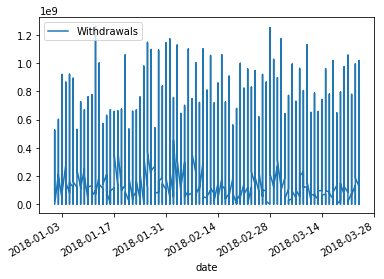

In [7]:
train_data.plot(x='date', y='Withdrawals')

## Preprocessing

In [78]:
from pandas import DataFrame

import os

### Preprocess train data

In [82]:
x_train = train_data[train_data.columns.difference(['currency', 'unplanned_deliveries', 'unplanned_returns', 'Trips', 'deposit', 'X1', 'Pre.Withdrawals', 'Carrier.Cost', 'saldo akhir'])]
x_train = x_train.replace('K', '', regex=True)
x_train.head()

,Balance.Cost,Deliveries,Returns,Withdrawals,no. ATM,saldo awal,uang_idle
date,,,,,,,
2018-01-01,32367,0,0,78700000,1,275600000,45304
2018-01-02,65392,460000000,146200000,112900000,1,196900000,32367
2018-01-03,47523,0,0,108700000,1,397800000,65392
2018-01-04,30970,0,0,100700000,1,289100000,47523
2018-01-05,62901,460000000,138000000,127750000,1,188400000,30970


#### Save preprocessed train data as CSV

In [83]:
train_data_dir = 'dataset/train/'

if not os.path.exists(train_data_dir):
    os.makedirs(train_data_dir)

In [84]:
atm_numbers = x_train['no. ATM'].unique()

x_trains = {}

for atm_number in atm_numbers:
    x_trains[atm_number] = x_train[x_train['no. ATM'] == str(atm_number)].drop(['no. ATM'], axis=1)
    x_trains[atm_number].to_csv(train_data_dir + atm_number + '_train.csv')

In [85]:
y_train = train_data['Withdrawals']

### Preprocess test data

In [48]:
x_test = test_data
x_test = x_test.replace('K', '', regex=True)
x_test.head()

,no. ATM
date,
2018-03-25,1
2018-03-26,1
2018-03-27,1
2018-03-28,1
2018-03-29,1


In [86]:
test_data_dir = 'dataset/test/'

if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)

In [87]:
x_test.to_csv(test_data_dir + 'test.csv')

## Model building

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
arima = ARIMA(x_train['no. ATM'].astype(float), order=(0, 1, 2))
arima.fit()

/home/holy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/holy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [43]:
print(arima.fit().summary())

/home/holy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/holy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:              D.no. ATM   No. Observations:               881815
Model:                 ARIMA(0, 1, 2)   Log Likelihood            -3696285.104
Method:                       css-mle   S.D. of innovations             16.002
Date:                Sat, 29 Sep 2018   AIC                        7392578.208
Time:                        10:32:21   BIC                        7392624.967
Sample:                    01-02-2018   HQIC                       7392591.141
                         - 03-24-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0121      0.017      0.707      0.479      -0.021       0.045
ma.L1.D.no. ATM  -5.96e-07      0.001     -0.001      1.000      -0.002       0.002
ma.L2.D.no. ATM -6.004e-07      